In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import random
# 创建数据集
n_data = torch.ones(50, 2)
x1 = torch.normal(2 * n_data, 1)
y1 = torch.zeros(50)
x2 = torch.normal(-2 * n_data, 1)
y2 = torch.ones(50)
x = torch.cat((x1, x2), 0).type(torch.FloatTensor)
y = torch.cat((y1, y2), 0).type(torch.LongTensor)



In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import random
# 定义函数生成二分类数据集
def generate_classification_dataset(size, feature_dim, mean_diff):
    # 生成均值为 mean_diff 和 -mean_diff，方差为 1 的正态分布数据
    X1 = np.random.normal(loc=mean_diff, scale=1, size=(size//2, feature_dim))
    X2 = np.random.normal(loc=-mean_diff, scale=1, size=(size//2, feature_dim))
    
    # 将两个数据集合并，并为它们的标签分别赋值为 0 和 1
    X = np.vstack((X1, X2))
    y = np.hstack((np.zeros(size//2), np.ones(size//2)))
    
    # 打乱数据集的顺序，确保数据的随机性
    idx = np.random.permutation(size)
    X = X[idx]
    y = y[idx]
    
    return X, y

# 定义数据集大小和特征维度
data_size = 10000
train_size = 7000
test_size = 3000
feature_dim = 200
mean_difference = 2.0  # 均值差异，设置为 2.0

# 生成两个数据集
X_train1, y_train1 = generate_classification_dataset(train_size, feature_dim, mean_difference)
X_test1, y_test1 = generate_classification_dataset(test_size, feature_dim, mean_difference)
# 将数据集打印输出
print("Dataset 1 - Train Features shape:", X_train1.shape)
print("Dataset 1 - Train Labels shape:", y_train1.shape)
print("Dataset 1 - Test Features shape:", X_test1.shape)
print("Dataset 1 - Test Labels shape:", y_test1.shape)

Dataset 1 - Train Features shape: (7000, 200)
Dataset 1 - Train Labels shape: (7000,)
Dataset 1 - Test Features shape: (3000, 200)
Dataset 1 - Test Labels shape: (3000,)


In [3]:
##实现线性回归的模型
def linreg(X,w,b):
    return torch.mm(X,w)+b

In [4]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

In [5]:
def my_model(X, w, b):
    linear_output = linreg(X,w,b)
    sigmoid_output = sigmoid(linear_output)
    return sigmoid_output

In [6]:
#以下的sgd函数实现了小批量随机梯度下降算法。它通过不断迭代模型参数
#来优化损失函数。这里自动求梯度模块计算得到的梯度是一个批量样本的梯度和。
#我们将它除以批量大小来得到平均值
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr*param.grad/batch_size #注意这里更改param时用的param.data

In [7]:
w = torch.tensor(np.random.normal(0, 0.01, (2, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [8]:
w = torch.rand(2,1,dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [9]:
#在后面的模型训练中，需要对这些参数求梯度来迭代参数的值、因此要设置requires_grad=True
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [10]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)#样本的读取顺序是随机的
    for i in range(0,num_examples,batch_size):
        j=torch.LongTensor(indices[i:min(i+batch_size,num_examples)]) #最后一次可能不足一个batch
        yield features.index_select(0,j),labels.index_select(0,j)

epoch 1,loss 1.576251
epoch 2,loss 1.430439
epoch 3,loss 1.296424
epoch 4,loss 1.174444
epoch 5,loss 1.064556
epoch 6,loss 0.966402
epoch 7,loss 0.879305
epoch 8,loss 0.802446
epoch 9,loss 0.734871
epoch 10,loss 0.675610
epoch 11,loss 0.623595
epoch 12,loss 0.577905
epoch 13,loss 0.537722
epoch 14,loss 0.502277
epoch 15,loss 0.470898
epoch 16,loss 0.442990
epoch 17,loss 0.418109
epoch 18,loss 0.395772
epoch 19,loss 0.375685
epoch 20,loss 0.357575


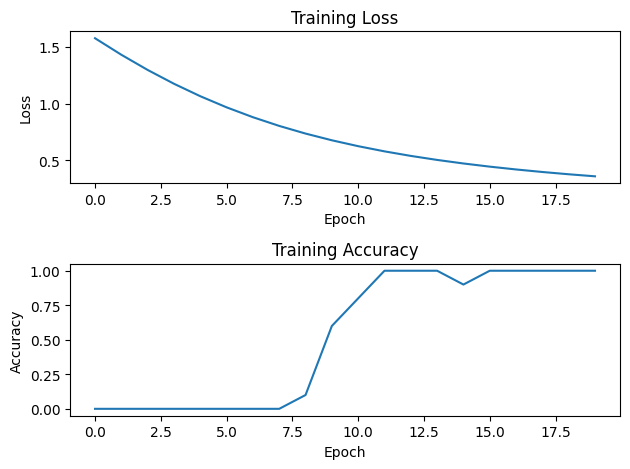

In [11]:
lr = 0.03
num_epochs=20
batch_size=10
net=my_model
loss = nn.BCELoss()
losses = []
accuracy = []

for epoch in range(num_epochs):  #训练模型一共需要num_epochs个跌倒周期
    #在某一个迭代周期中，会使用训练数据集中所有的样本一次
    for X,Y in data_iter(batch_size,x,y): #x和y分别是小批量样本的特征和标签
        outputs = net(X,w,b).view(-1)
        l=loss(outputs,Y.float()).sum() #l是有关小批量X和y的损失
        l.backward()  #小批量的损失对模型参数求梯度
        sgd([w,b],lr,batch_size) #使用小批量随机梯度下降迭代模型参数
        w.grad.data.zero_()  #梯度清零
        b.grad.data.zero_()
    train_l = loss(net(x,w,b).view(-1),y.float())
    print('epoch %d,loss %f'%(epoch+1,train_l.mean().item()))
    
    # 记录损失和准确率
    losses.append(train_l.item())
    predicted = (outputs >= 0.5).float()
    acc = (predicted == Y).sum().item() / Y.size(0)
    accuracy.append(acc)
    
# 绘制损失曲线和准确率曲线
plt.subplot(2, 1, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(2, 1, 2)
plt.plot(accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()